Assignment 2
Regression_Problem

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
!pip install statsmodels
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [9]:
df = pd.read_csv('tips (data for regression problem).csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
df["sex"] = df["sex"].map({"Female" : 0, "Male" : 1})
df["smoker"] = df["smoker"].map({"Yes" : 1, "No" : 0})
df["day"] = df["day"].map({"Thur" : 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch" : 0, "Dinner" : 1})

In [18]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [20]:
x = np.array(df[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(df["tip"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=50)

Exploratory Data Analysis (EDA)

Scatter Plot  :-

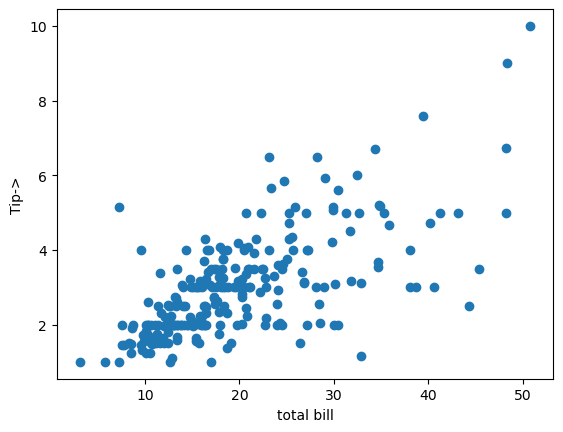

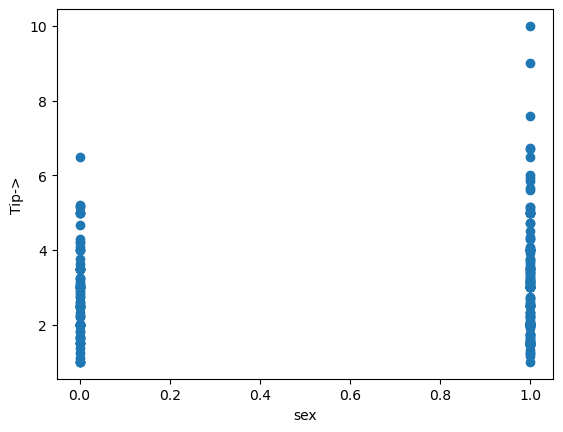

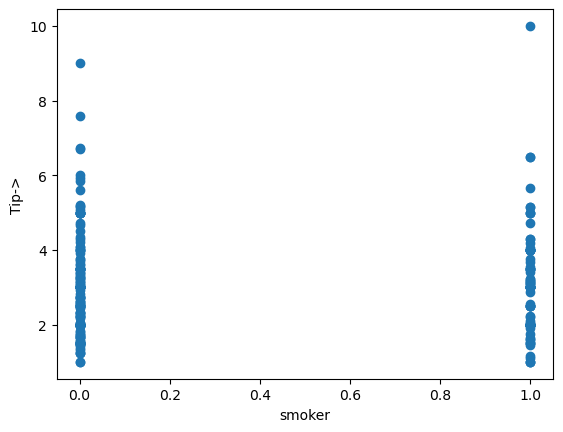

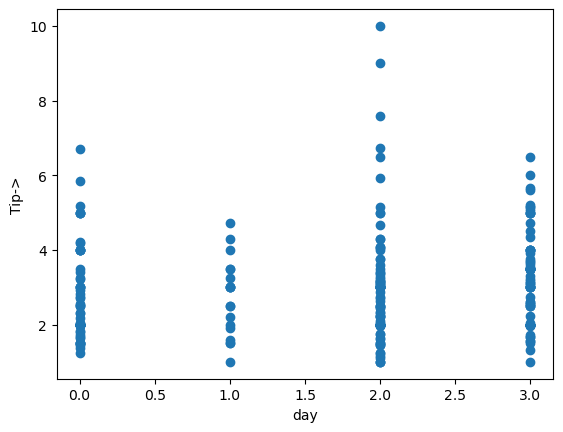

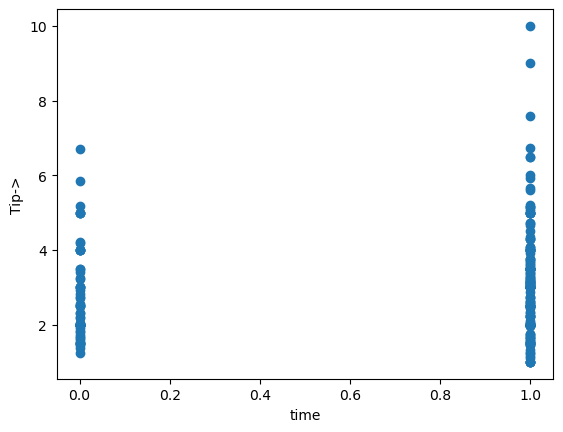

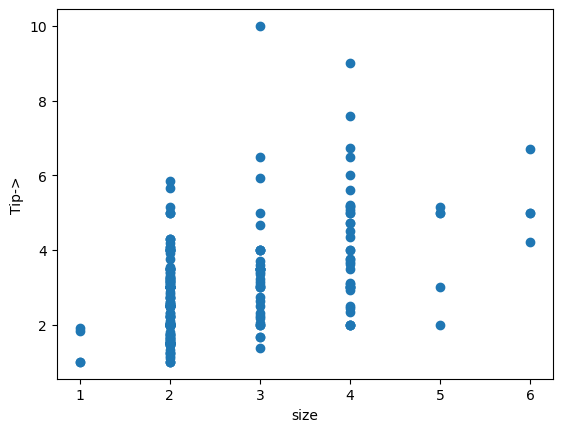

In [22]:
feature = [("total bill",df['total_bill']),("sex", df['sex']),("smoker", df['smoker']),("day", df['day']),
              ("time", df['time']),("size", df['size'])]
for a,b in feature:
    plt.scatter(b, df['tip'])
    plt.xlabel(a)
    plt.ylabel('Tip->')
    plt.show()

Pair Plot :-

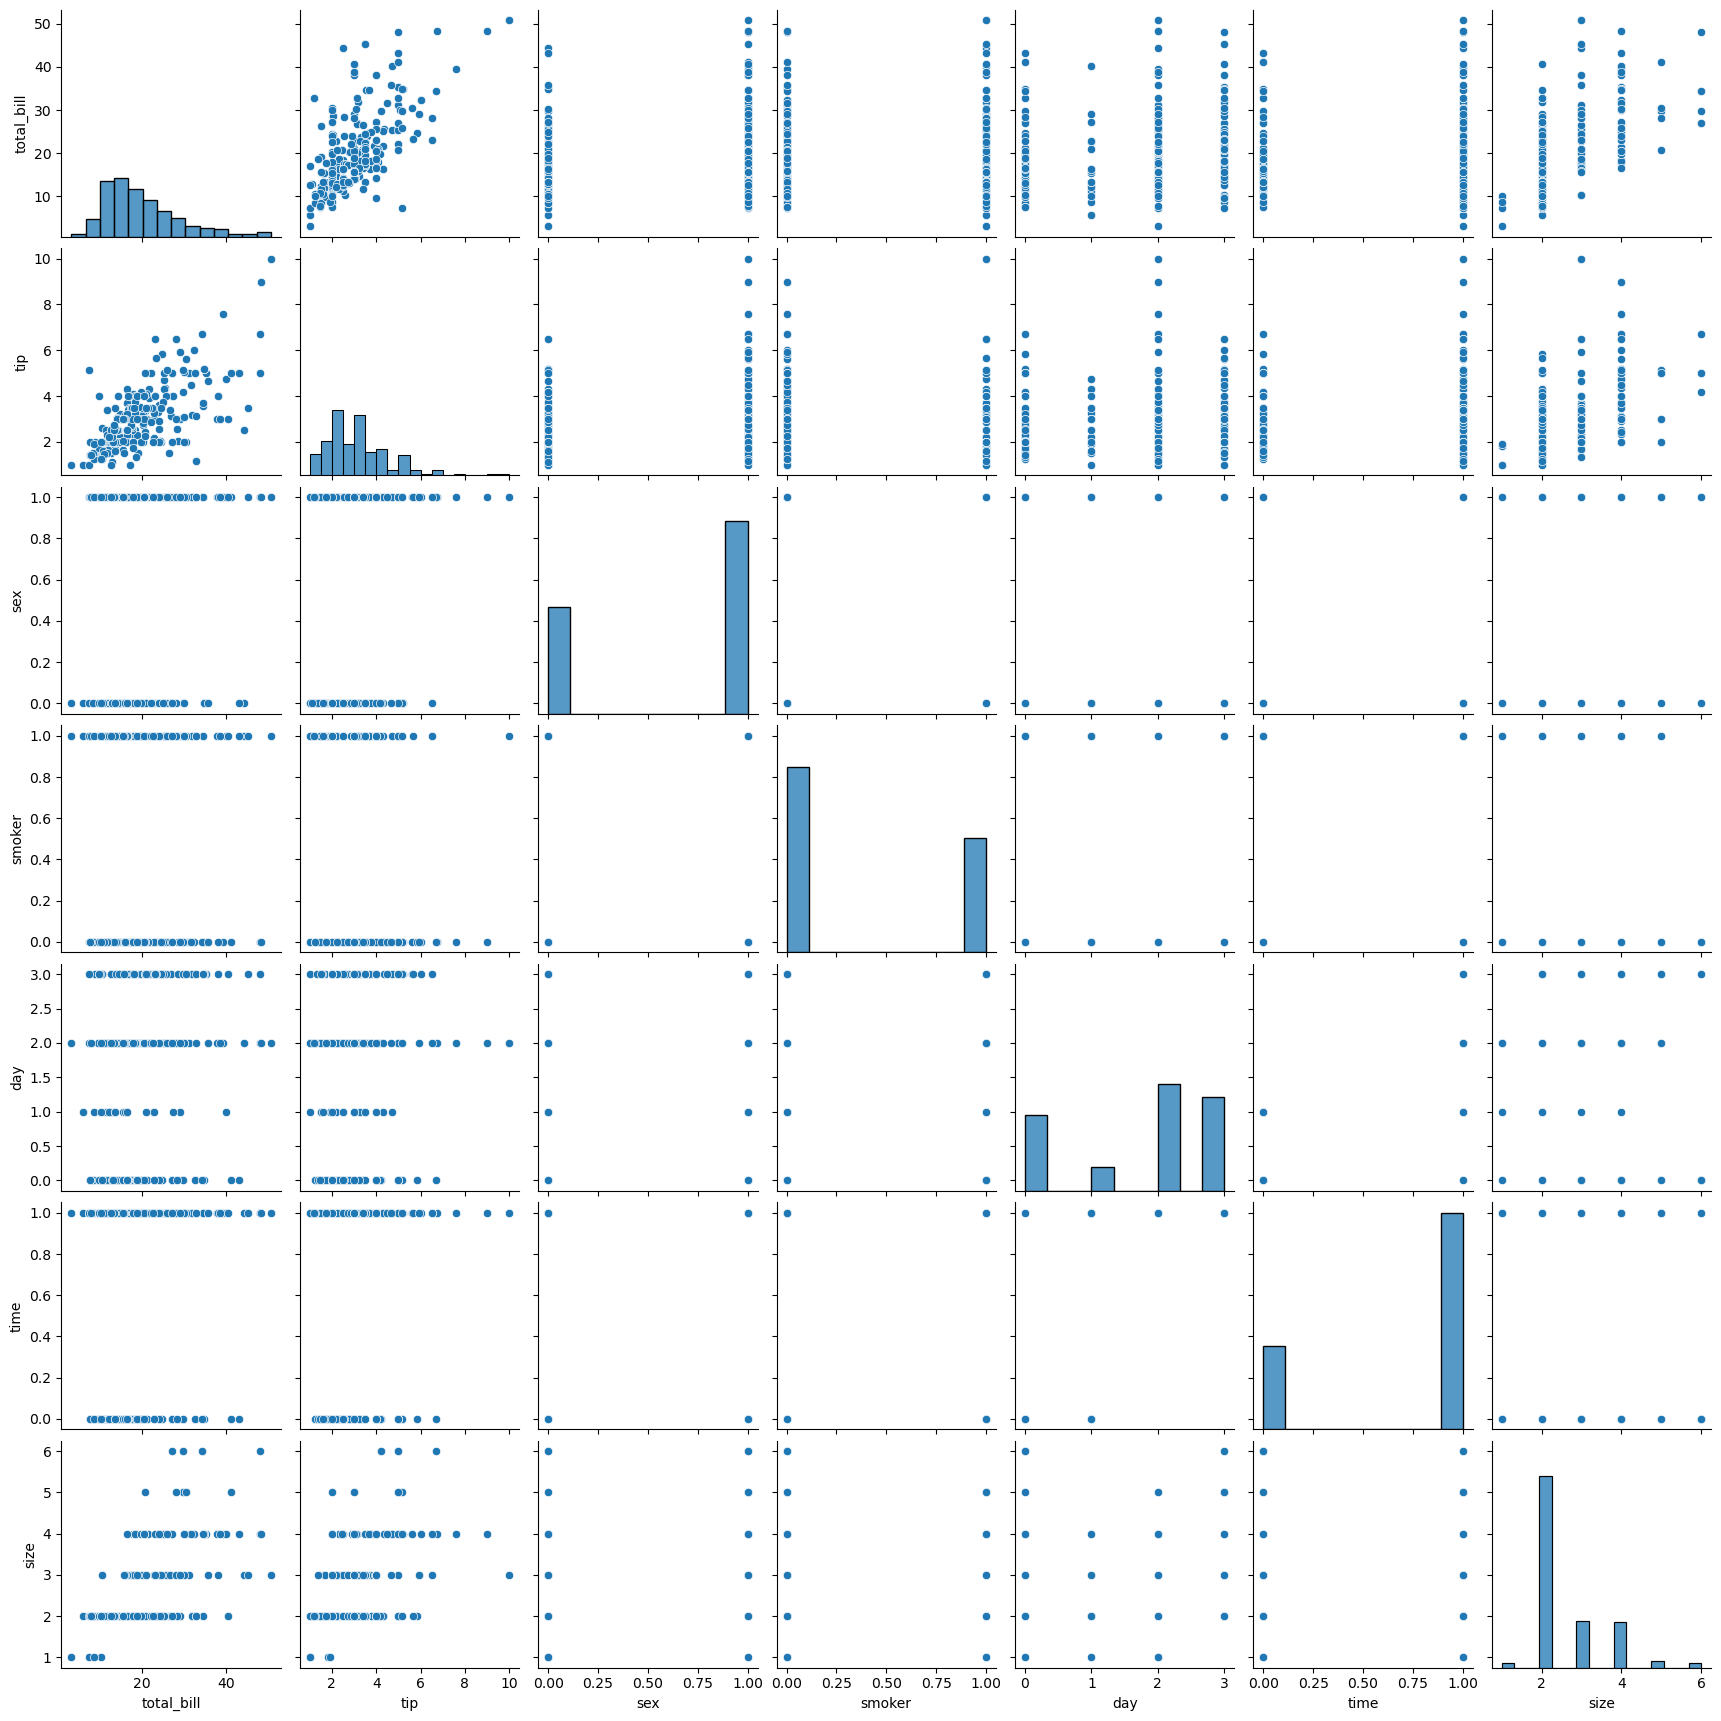

In [24]:
sns.pairplot(df)
plt.show()

Correlation Heatmap :-

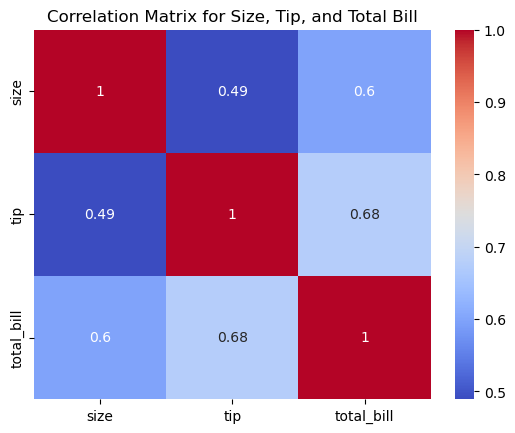

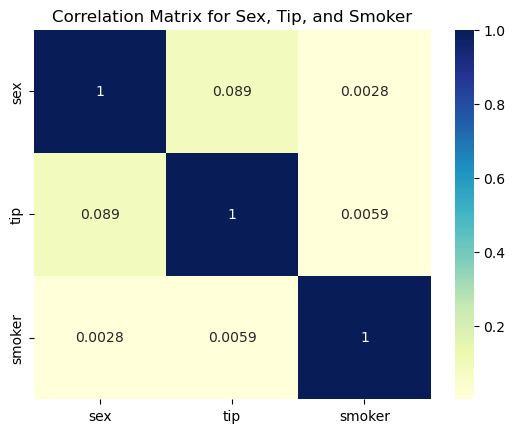

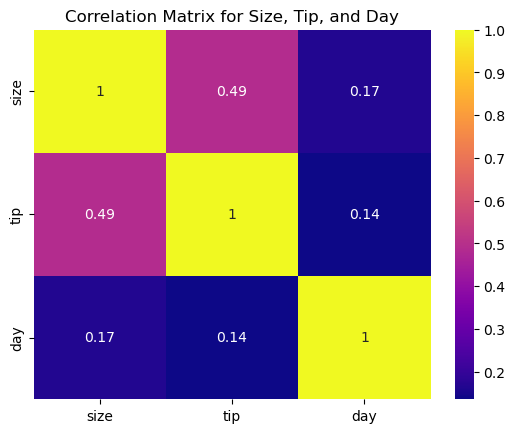

In [25]:
corr_matrix = df[['size', 'tip', 'total_bill']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Size, Tip, and Total Bill')
plt.show()

corr_matrix = df[['sex', 'tip', 'smoker']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix for Sex, Tip, and Smoker')
plt.show()

corr_matrix = df[['size', 'tip', 'day']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix for Size, Tip, and Day')
plt.show()

Timeseries :-

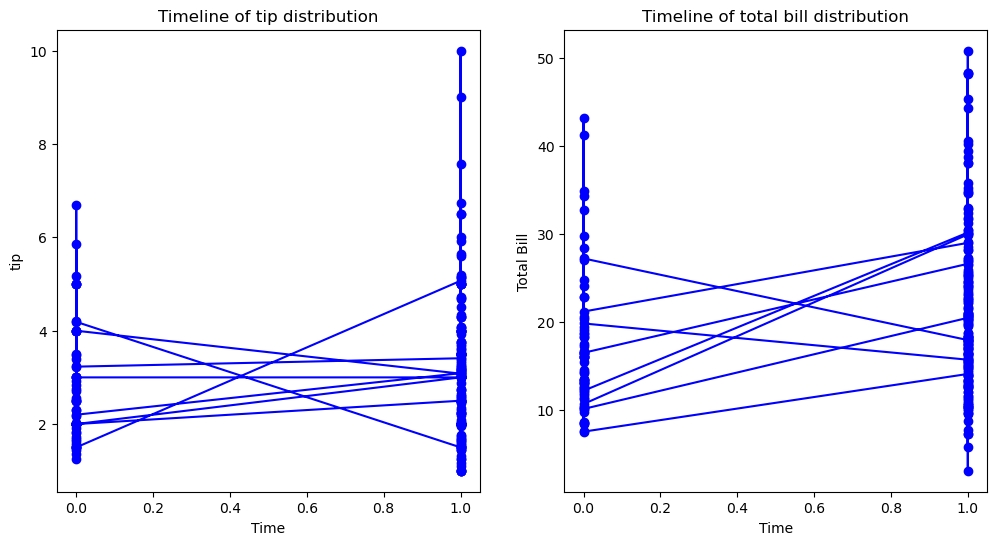

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(df['time'], df['tip'], marker='o', linestyle='-', color='b')
plt.title('Timeline of tip distribution')
plt.xlabel('Time')
plt.ylabel('tip')

plt.subplot(1,2,2)
plt.plot(df['time'], df['total_bill'], marker='o', linestyle='-', color='b')
plt.title('Timeline of total bill distribution')
plt.xlabel('Time')
plt.ylabel('Total Bill')

plt.show()

Rainbow Test for Linearity :-

In [32]:
features = [df['total_bill'], df['sex'],df['smoker'],df['day'],df['time'],df['size']]
for p in features:
    X = sm.add_constant(df['total_bill'])
    Y = p
    model = sm.OLS(Y, X).fit()
    rainbow_stats, rainbow_p_value = linear_rainbow(model)
    print(f'rainbow test statistic ": {rainbow_stats}, p-value: {rainbow_p_value}')

rainbow test statistic ": 1.054440325780516, p-value: 0.3857534865226604
rainbow test statistic ": 0.9596359860385912, p-value: 0.589647289135287
rainbow test statistic ": 1.0967661477556316, p-value: 0.3063260908207796
rainbow test statistic ": 0.7217406121305129, p-value: 0.9630389085869562
rainbow test statistic ": 0.6858476996611751, p-value: 0.9805475303218094
rainbow test statistic ": 0.7869159695051353, p-value: 0.9056759819539291


Residuals Plot :-

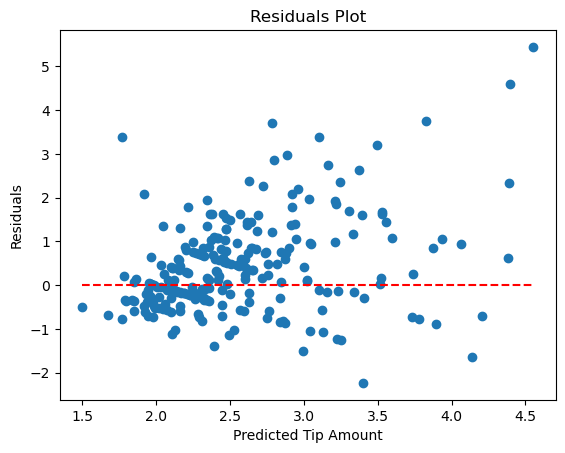

In [34]:
y_pred = model.predict(X)
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Tip Amount')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

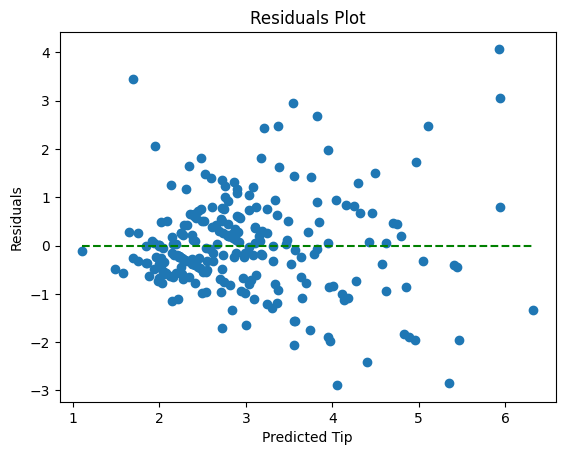

In [42]:
model = Ridge()
model.fit(x, y)
predicted = model.predict(x)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.hlines(0, xmin=predicted.min(), xmax=predicted.max(), colors='green', linestyles='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [36]:
print("Feature matrix shape:", xtrain.shape)
print("Target vector shape:", ytrain.shape)

Feature matrix shape: (195, 6)
Target vector shape: (195,)


Model Traning and Evaluation 

In [38]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("SVR", SVR()),
    ("KNN", KNeighborsRegressor())
]
for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    r2 = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    print(f"{name} - R^2: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")    

Linear Regression - R^2: 0.3529, MAE: 0.8532, RMSE: 1.1280
Ridge Regression - R^2: 0.3535, MAE: 0.8526, RMSE: 1.1275
Lasso Regression - R^2: 0.3758, MAE: 0.8234, RMSE: 1.1079
Decision Tree - R^2: -0.0605, MAE: 1.1641, RMSE: 1.4441
Random Forest - R^2: 0.2639, MAE: 0.8515, RMSE: 1.2031
SVR - R^2: 0.3925, MAE: 0.7801, RMSE: 1.0929
KNN - R^2: 0.2152, MAE: 0.8980, RMSE: 1.2422


Insights and Model Comparison 

In [40]:
results = []
for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    r2 = r2_score(ytest, ypred)
    mae = mean_absolute_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    results.append({
        'Model': name,
        'R^2': r2,
        'MAE': mae,
        'RMSE': rmse
    })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE')
print(results_df)

               Model       R^2       MAE      RMSE
5                SVR  0.392518  0.780086  1.092946
2   Lasso Regression  0.375804  0.823368  1.107880
1   Ridge Regression  0.353548  0.852584  1.127459
0  Linear Regression  0.352929  0.853219  1.127998
4      Random Forest  0.271937  0.850569  1.196511
6                KNN  0.215215  0.898041  1.242246
3      Decision Tree -0.086576  1.189388  1.461714


Insights for management 

Feature Importances from Random Forest Model:
      Feature  Importance
0  total_bill    0.770763
5        size    0.093088
2      smoker    0.054341
3         day    0.051842
1         sex    0.020468
4        time    0.009497


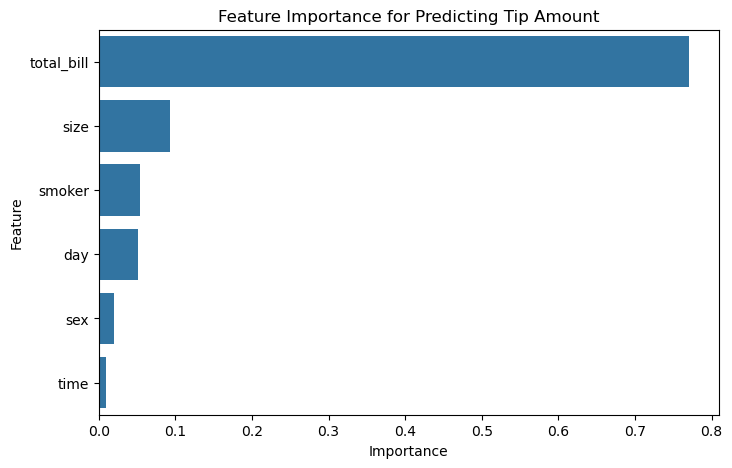

In [42]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xtrain, ytrain)

feature_importances = rf_model.feature_importances_
feature_names = ["total_bill", "sex", "smoker", "day", "time", "size"]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances from Random Forest Model:")
print(importance_df)

plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title('Feature Importance for Predicting Tip Amount')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

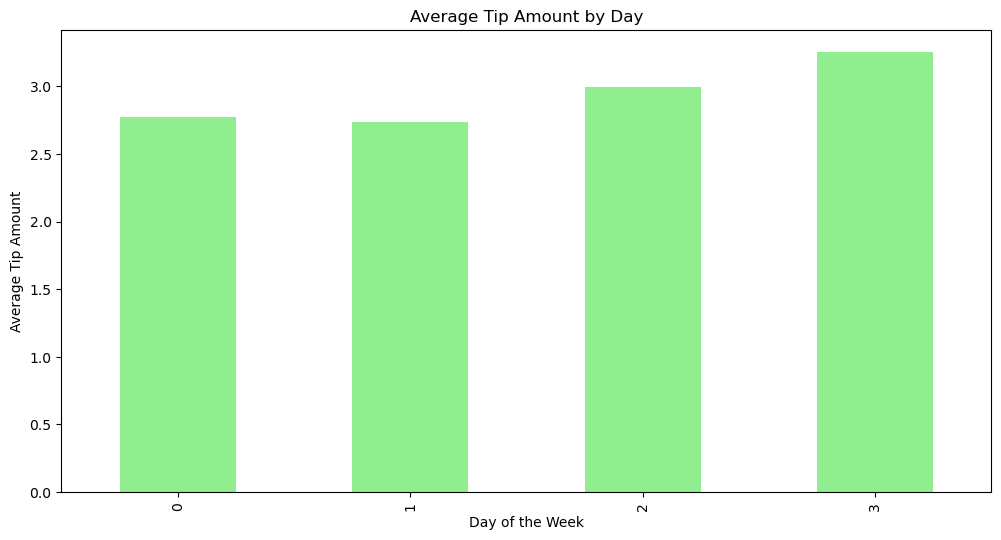

In [48]:
# Tip analysis according to days
# Calculating average tip per day
avg_tip_per_day = df.groupby('day')['tip'].mean().sort_index()

# Bar plot for average tip amount per day
plt.figure(figsize=(12, 6))
avg_tip_per_day.plot(kind='bar', color='lightgreen')  # Changed color to lightgreen
plt.title('Average Tip Amount by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip Amount')
plt.show()


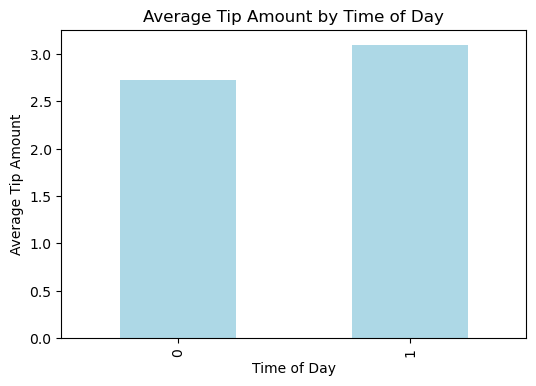

In [50]:
# Calculate average tip amount by time of day (lunch vs. dinner)
avg_tip_by_time = df.groupby('time')['tip'].mean()

# Bar plot for average tip amount by time of day
plt.figure(figsize=(6, 4))
avg_tip_by_time.plot(kind='bar', color='lightblue')  # Changed color to lightblue
plt.title('Average Tip Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip Amount')
plt.show()

Conclusion :-

Analysis shows that tips tend to increse when bills exceed $25, suggesting that promoting menu items or bundles within this price range could be advantageous. Group bookings for parties of 3-4 may also be profitable, as these groups are likely to tip more generously. Since tips are higher on weekends, introducing special weekend offers could be effective in maximizing revenue. additionally, male patrons have been found to tip more, so targeted strategies to enhance their experience may further boost tips. Finally, enhancing the dining environment and service duroing dinner hours may increse tip amounts, as dinner typically yeilds higher tips than lunch.